### Heart Attack Possibility

Lupe Luna | September 18, 2021

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from pandas.plotting import register_matplotlib_converters
from scipy import stats

from acquire import get_df, get_info
from prepare import clean_heart_data, split_data
from explore import explore_univariate

#visualize
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#train test split from sklearn
from sklearn.model_selection import train_test_split
#imputer from sklearn
from sklearn.impute import SimpleImputer

# to evaluate performance using rmse
from sklearn.metrics import mean_squared_log_error
from math import sqrt

# for tsa
import statsmodels.api as sm

# holt's linear trend model.
from statsmodels.tsa.api import Holt

# Decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

# Logistic Regression
from sklearn.linear_model import LogisticRegression

#### Acquire the Data

In [2]:
# Bring in the heart.csv data from acquire.py
df = get_df()

In [3]:
# Information Breakdown for Data
print(get_info(df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None

------------------------

This dataframe has 303 rows and 14 columns.

------------------------

Null count in dataframe:
------------------------
age         0
sex         0
cp          0
trestbps    0
chol      

In [4]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [5]:
df.duplicated().sum()

1

#### Acquire Takeaways
- There are no null values
- Our columns are all numerical

### Prepare/Clean Data

In [6]:
# clean data
df = clean_heart_data(df)
df.head()

,age,is_male,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,restecg,max_heart_rate,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
#sns.boxplot(x='target', y='age', data=df)


#### Prepare Takeaways
- renamed the columns so that the dataframe is easier to read
- removed the duplicate

### Explore

In [8]:
df.columns

Index(['age', 'is_male', 'chest_pain', 'resting_blood_pressure', 'cholesterol',
       'fasting_blood_sugar', 'restecg', 'max_heart_rate', 'exang', 'oldpeak',
       'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
df.slope.value_counts()

2    141
1    140
0     21
Name: slope, dtype: int64

In [24]:
# explore univariate function
cat_vars = ['is_male', 'chest_pain', 'fasting_blood_sugar', 'restecg', 'exang', 'slope', 'thal']
quant_vars = ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate', 'oldpeak', 'ca']

Bar Plot of is_male


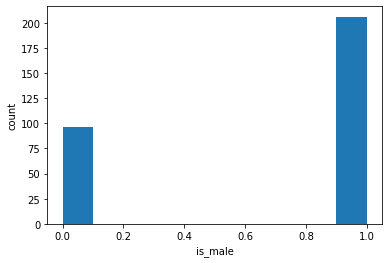

Bar Plot of chest_pain


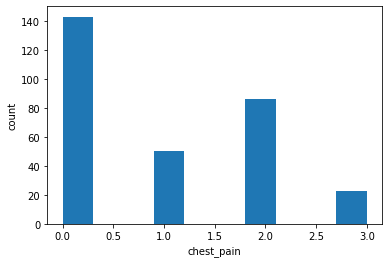

Bar Plot of fasting_blood_sugar


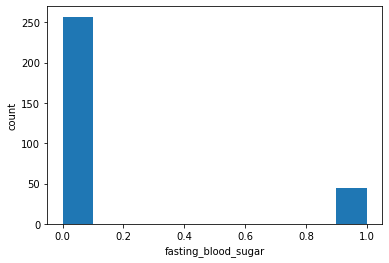

Bar Plot of restecg


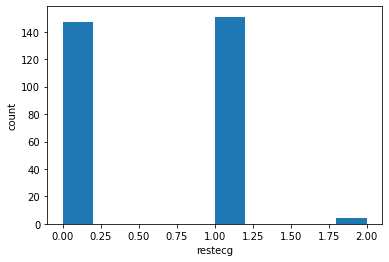

Bar Plot of exang


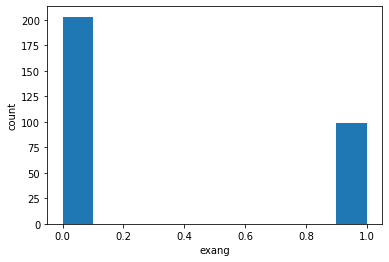

Bar Plot of slope


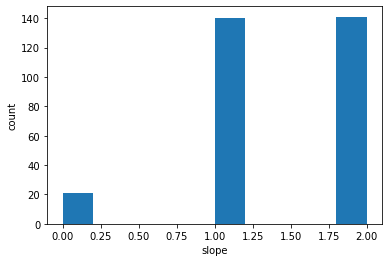

Bar Plot of thal


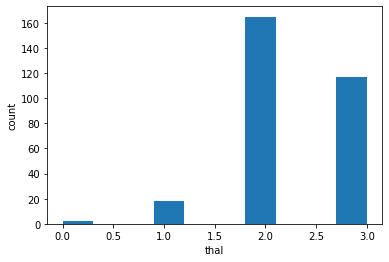

Distribution of age


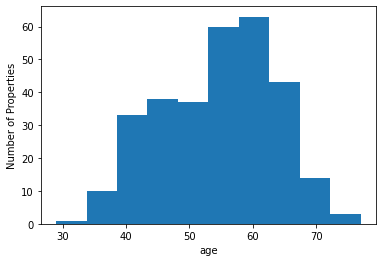

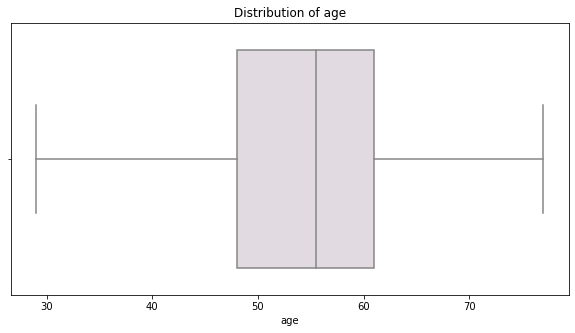

Distribution of resting_blood_pressure


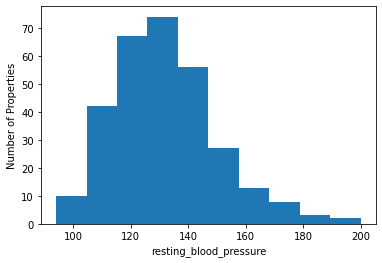

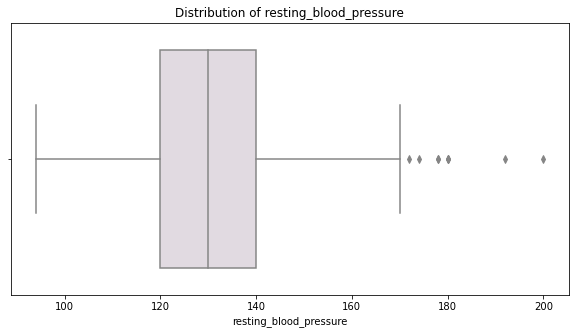

Distribution of cholesterol


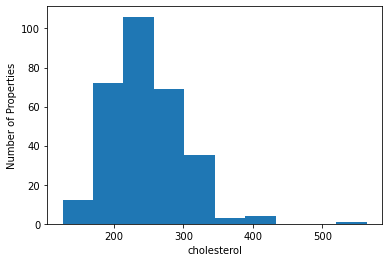

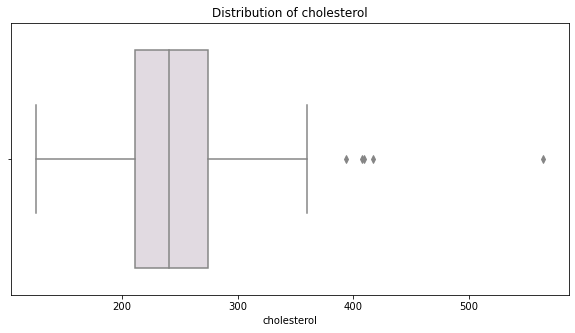

Distribution of max_heart_rate


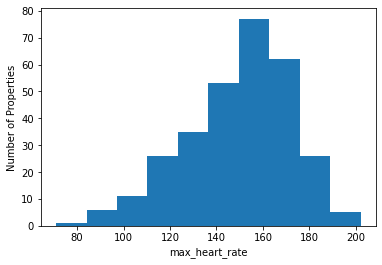

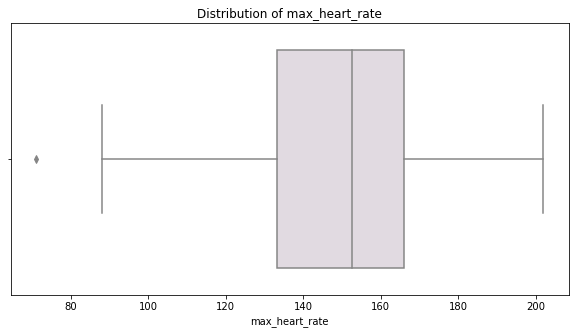

Distribution of oldpeak


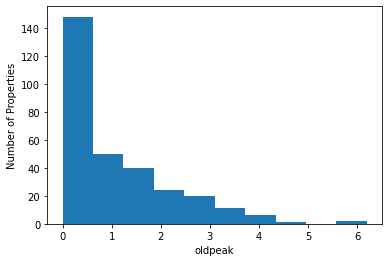

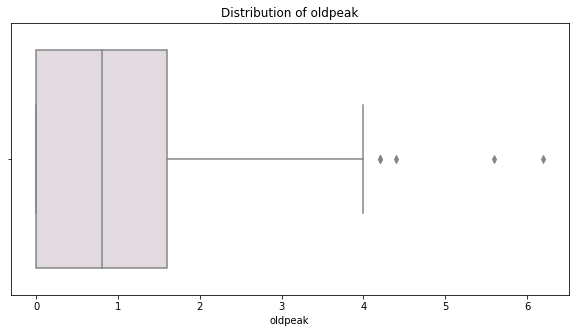

Distribution of ca


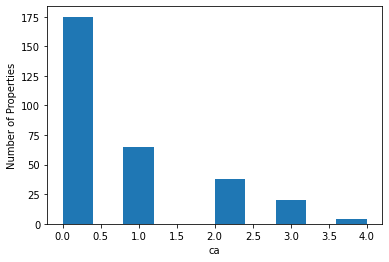

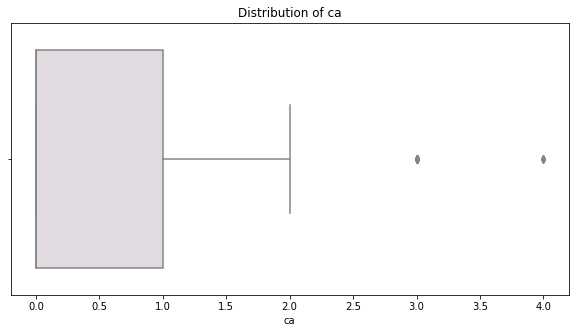

In [25]:
explore_univariate(df, cat_vars, quant_vars)

In [26]:
# split the data into train, validate, test
train, validate, test = split_data(df)

Making Sure Our Shapes Look Good
Train: (168, 14), Validate: (73, 14), Test: (61, 14)
Making Sure We Have Positive Cases In Each Split

Train Target Value Counts:
1    91
0    77
Name: target, dtype: int64
----------------------------

Validate Target Value Counts:
1    40
0    33
Name: target, dtype: int64
----------------------------

Test Target Value Counts:
1    33
0    28
Name: target, dtype: int64
----------------------------



Does age indicate whether or not someone has a higher liklihood of having a hear attack?


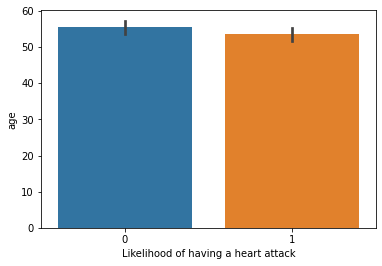

Does resting_blood_pressure indicate whether or not someone has a higher liklihood of having a hear attack?


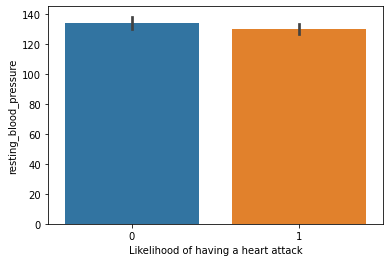

Does cholesterol indicate whether or not someone has a higher liklihood of having a hear attack?


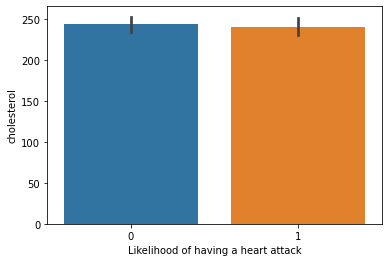

Does max_heart_rate indicate whether or not someone has a higher liklihood of having a hear attack?


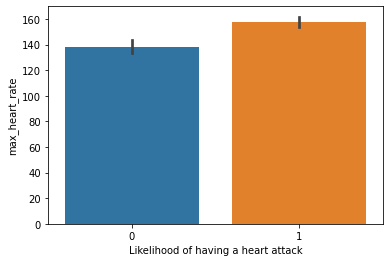

Does oldpeak indicate whether or not someone has a higher liklihood of having a hear attack?


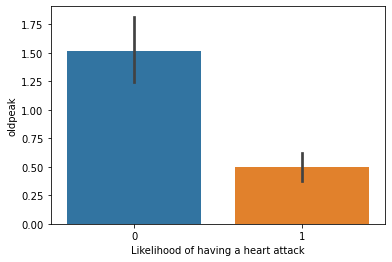

Does ca indicate whether or not someone has a higher liklihood of having a hear attack?


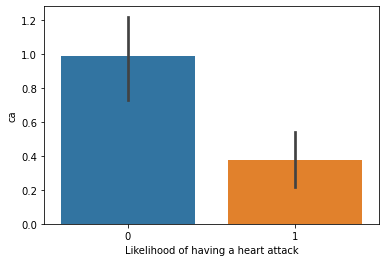

In [27]:
for col in quant_vars:
    print(f'Does {col} indicate whether or not someone has a higher liklihood of having a hear attack?')
    sns.barplot(x='target', y=col, data=train)
    plt.xlabel('Likelihood of having a heart attack')
    plt.show()

Amount of Patients per Is_Male


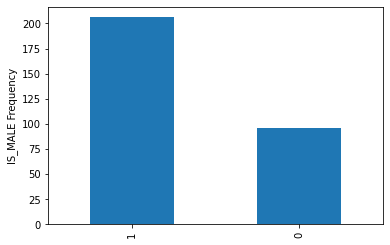

Amount of Patients per Chest_Pain


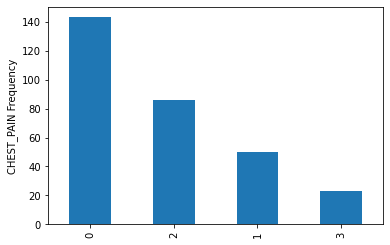

Amount of Patients per Fasting_Blood_Sugar


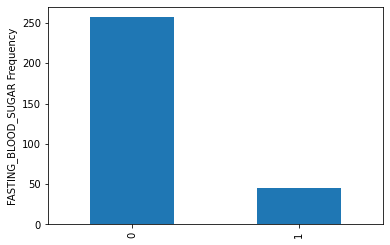

Amount of Patients per Restecg


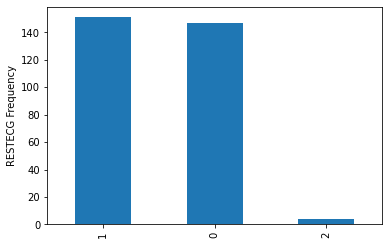

Amount of Patients per Exang


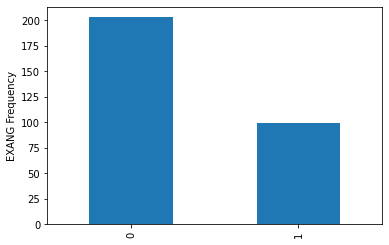

Amount of Patients per Slope


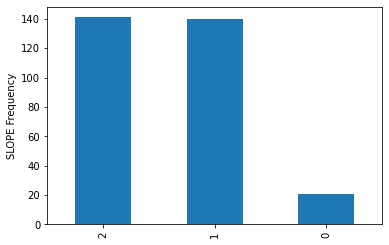

Amount of Patients per Thal


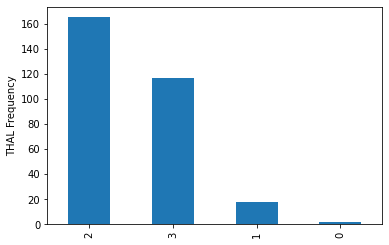

In [47]:
for col in cat_vars:
    print(f'Amount of Patients per {col.title()}')
    df[col].value_counts().plot.bar()
    plt.ylabel(f'{col.upper()} Frequency')
    plt.show()

Does is_male have a relationship with whether someone will have a heart attack?


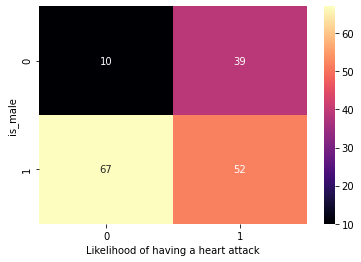

Does chest_pain have a relationship with whether someone will have a heart attack?


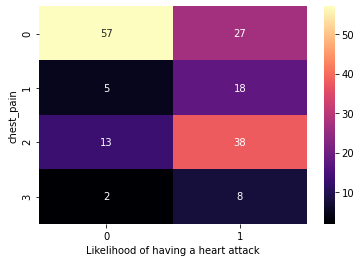

Does fasting_blood_sugar have a relationship with whether someone will have a heart attack?


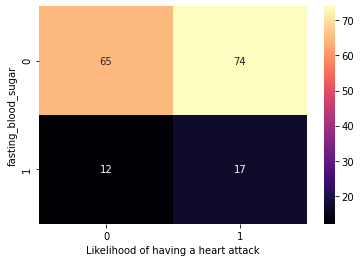

Does restecg have a relationship with whether someone will have a heart attack?


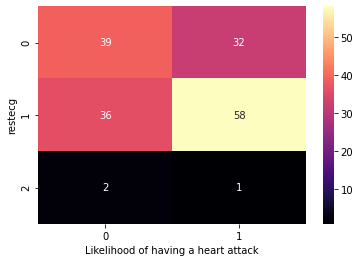

Does exang have a relationship with whether someone will have a heart attack?


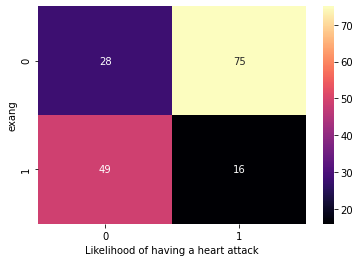

Does slope have a relationship with whether someone will have a heart attack?


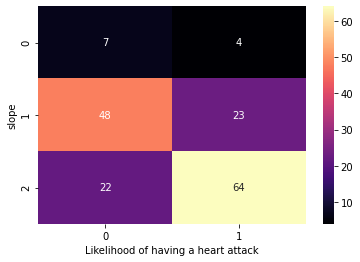

Does thal have a relationship with whether someone will have a heart attack?


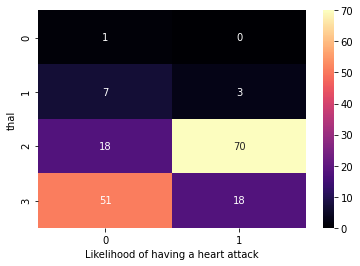

In [55]:
for col in cat_vars:
    ctab = pd.crosstab(train[col], train.target)
    print(f'Does {col} have a relationship with whether someone will have a heart attack?')
    sns.heatmap(data=ctab, annot=True, cmap='magma')
    plt.xlabel('Likelihood of having a heart attack')
    plt.show()

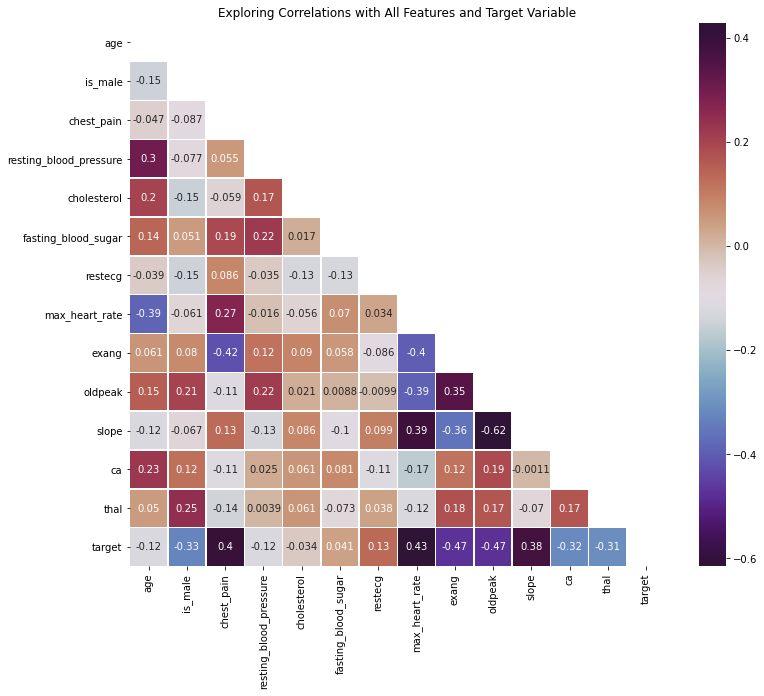

In [57]:
plt.figure(figsize=(12,10))
corr_matrix = train.corr()
sns.heatmap(corr_matrix, cmap='twilight_shifted', annot=True, linewidth=0.5, mask= np.triu(corr_matrix))
plt.title("Exploring Correlations with All Features and Target Variable")
plt.show()

In [58]:
#sns.pairplot(data=train[quant_vars])

In [59]:
train.columns.to_list()

['age',
 'is_male',
 'chest_pain',
 'resting_blood_pressure',
 'cholesterol',
 'fasting_blood_sugar',
 'restecg',
 'max_heart_rate',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [60]:
# heatmap_columns = ['tenure', 'phone_service', 'monthly_charges', 'total_charges', 'month_to_month', 'one_year', 
#                    'two_year', 'is_automatic', 'churned']

# corr_matrix = explore_df[heatmap_columns].corr()
# sns.heatmap(corr_matrix, cmap='twilight_shifted', annot=True, linewidth=0.5, mask= np.triu(corr_matrix))
# plt.show()

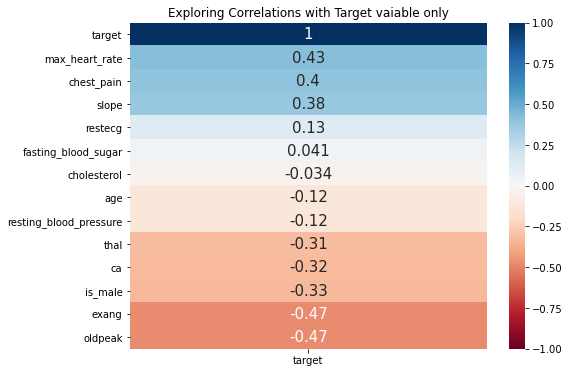

In [61]:
## making a heat map to look at correlations with target for the train data set
## helping me choose which features to use in my model

plt.figure(figsize = (8, 6))  
sns.heatmap(train.corr()[['target']].sort_values(by='target', ascending = False), 
            cmap = 'RdBu', vmax = 1, vmin = -1, center = 0, annot = True, annot_kws={"size": 15} )
plt.title('Exploring Correlations with Target vaiable only')
plt.show()

### Modeling

### Delivery

### Conclusion